# Visualizing Raw Premier League Data (1)

The source for this first piece of data: https://www.football-data.co.uk/englandm.php

Notes for interpreting this data: https://www.football-data.co.uk/notes.txt

## Loading Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'../data/E0_2526.csv')
#df

First, check that the amount of matches per team is the same (as to not cause errors). 

In [2]:
#finding matches per team
teams = df['HomeTeam'].unique().tolist()

matches_per_team = {}
for team in teams:
    home_matches = df[df['HomeTeam'] == team].shape[0]
    away_matches = df[df['AwayTeam'] == team].shape[0]
    total_matches = home_matches + away_matches
    matches_per_team[team] = total_matches

In [3]:
#matches_per_team

## Home Advantage Quantification

Goal Distributions: 

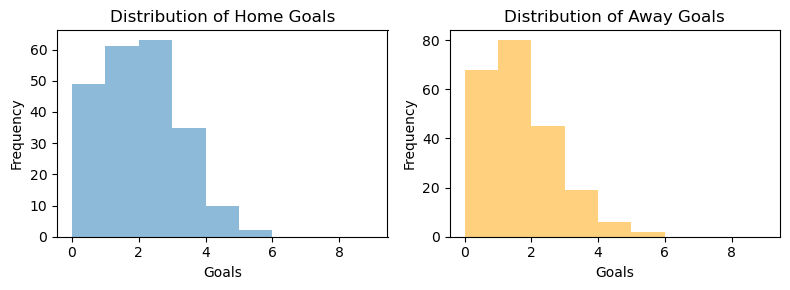

Average number of home goals: 1.55
Average number of away goals: 1.19


In [4]:
#histogram of FTAG and FTHG
import matplotlib.pyplot as plt

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

ax1.hist(df['FTHG'], bins=range(0, 10), alpha=0.5, label='FTHG')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Home Goals')

ax2.hist(df['FTAG'], bins=range(0, 10), alpha=0.5, label='FTAG', color ='orange')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Away Goals')
plt.tight_layout()
plt.show()

#average home goals:
average_home_goals = df['FTHG'].mean()
print("Average number of home goals: " + str(round(average_home_goals, 2)))

#average away goals:
average_away_goals = df['FTAG'].mean()
print("Average number of away goals: " + str(round(average_away_goals, 2)))

In [5]:
team_stats = []
for team in teams:
    home_goals_scored = df[df['HomeTeam'] == team]['FTHG'].mean()
    home_goals_conceded = df[df['HomeTeam'] == team]['FTAG'].mean()
    away_goals_scored = df[df['AwayTeam'] == team]['FTAG'].mean()
    away_goals_conceded = df[df['AwayTeam'] == team]['FTHG'].mean()
    
    team_stats.append({
        'Team': team,
        'meanHomeGoalsScored': home_goals_scored,
        'meanHomeGoalsConceded': home_goals_conceded,
        'meanAwayGoalsScored': away_goals_scored,
        'meanAwayGoalsConceded': away_goals_conceded,
        'meanHomeNetGD': home_goals_scored - home_goals_conceded,
        'meanAwayNetGD': away_goals_scored - away_goals_conceded
    })

team_stats_df = pd.DataFrame(team_stats)

In [16]:
for index, row in team_stats_df.iterrows():
    if (row['Team'].split()[-1] == 'United') or (row['Team'].split()[-1] == 'City'):
        team_stats_df.at[index, 'abbreviatedTeam'] = row['Team'].split()[0][:3].upper() + ' ' + row['Team'].split()[-1][:1].upper() + '.'
    else:
        team_stats_df.at[index, 'abbreviatedTeam'] = row['Team'][:3].upper()

In [17]:
team_stats_df

,Team,meanHomeGoalsScored,meanHomeGoalsConceded,meanAwayGoalsScored,meanAwayGoalsConceded,meanHomeNetGD,meanAwayNetGD,abbreviatedTeam
0,Liverpool,1.454545,1.000000,1.545455,1.636364,0.454545,-0.090909,LIV
1,Aston Villa,1.636364,0.818182,1.363636,1.454545,0.818182,-0.090909,AST
2,Brighton,1.727273,1.090909,1.181818,1.545455,0.636364,-0.363636,BRI
3,Sunderland,1.636364,0.818182,0.454545,1.272727,0.818182,-0.818182,SUN
4,Tottenham,1.181818,1.272727,1.636364,1.363636,-0.090909,0.272727,TOT
5,Wolves,0.909091,2.090909,0.454545,1.636364,-1.181818,-1.181818,WOL
6,Chelsea,1.545455,1.000000,1.727273,1.181818,0.545455,0.545455,CHE
7,Nott'm Forest,1.090909,1.545455,0.818182,1.545455,-0.454545,-0.727273,NOT
8,Man United,1.818182,1.181818,1.636364,1.727273,0.636364,-0.090909,MAN U.
9,Leeds,1.727273,1.181818,1.000000,2.181818,0.545455,-1.181818,LEE


Visualizing Home vs. Away Goal Averages by Team:

Average PPG at home: 1.62
Average PPG away: 1.11
Home advantage (points difference): 0.50

Match Outcome Distribution:
Home Win: 99 matches (45.0%)
Draw: 59 matches (26.8%)
Away Win: 62 matches (28.2%)


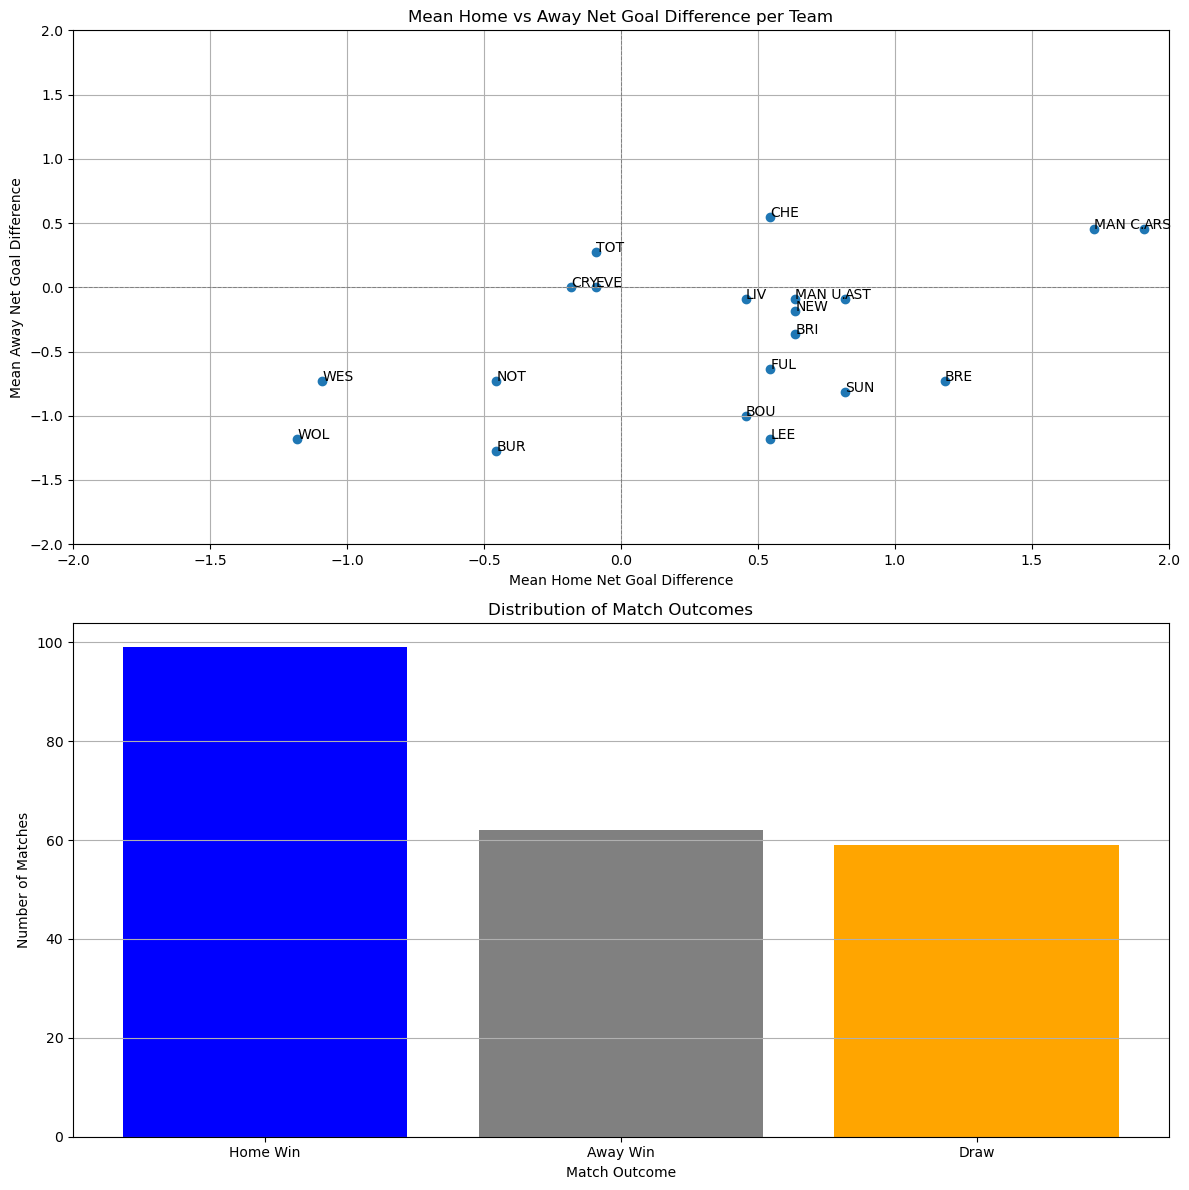

In [18]:
#Home vs. Away Net Goal Difference Scatter Plot

fig, ax = plt.subplots(2, figsize=(12, 12))

ax[0].scatter(team_stats_df['meanHomeNetGD'], team_stats_df['meanAwayNetGD'])
ax[0].set_xlabel('Mean Home Net Goal Difference')
ax[0].set_ylabel('Mean Away Net Goal Difference')
ax[0].set_title('Mean Home vs Away Net Goal Difference per Team')
for i, team in enumerate(team_stats_df['abbreviatedTeam']):
    ax[0].annotate(team, (team_stats_df['meanHomeNetGD'][i], team_stats_df['meanAwayNetGD'][i]))
ax[0].axhline(0, color='grey', linestyle='--', linewidth=0.7)
ax[0].axvline(0, color='grey', linestyle='--', linewidth=0.7)
ax[0].grid(True)
ax[0].axis([-2, 2, -2, 2])

#home vs. away points

#adding calculations
df['HomePoints'] = df.apply(lambda row: 3 if row['FTHG'] > row['FTAG'] else (1 if row['FTHG'] == row['FTAG'] else 0) if row['HomeTeam'] in team_stats_df['Team'].values else 0, axis=1)
df['AwayPoints'] = df.apply(lambda row: 3 if row['FTAG'] > row['FTHG'] else (1 if row['FTAG'] == row['FTHG'] else 0) if row['AwayTeam'] in team_stats_df['Team'].values else 0, axis=1)

avg_home_pts = df['HomePoints'].mean()
avg_away_pts = df['AwayPoints'].mean()

print(f"Average PPG at home: {avg_home_pts:.2f}")
print(f"Average PPG away: {avg_away_pts:.2f}")
print(f"Home advantage (points difference): {avg_home_pts - avg_away_pts:.2f}")

#calculating points by team
home_points_by_team = df.groupby(['HomeTeam'])['HomePoints'].mean().reset_index()
away_points_by_team = df.groupby(['AwayTeam'])['AwayPoints'].mean().reset_index()

#Match Distribution: 
df['Outcome'] = df.apply(lambda row: 'Home Win' if row['FTHG'] > row['FTAG'] else ('Away Win' if row['FTAG'] > row['FTHG'] else 'Draw'), axis=1)

outcome_counts = df['Outcome'].value_counts()
outcome_percents = outcome_counts / len(df) * 100

print("=" * 20)

print("\nMatch Outcome Distribution:")
for outcome in ['Home Win', 'Draw', 'Away Win']:
    count = outcome_counts.get(outcome, 0)
    pct = outcome_percents.get(outcome, 0)
    print(f"{outcome}: {count} matches ({pct:.1f}%)")

ax[1].bar(outcome_counts.index, outcome_counts.values, color=['blue', 'grey', 'orange'])
ax[1].set_xlabel('Match Outcome')
ax[1].set_ylabel('Number of Matches')
ax[1].set_title('Distribution of Match Outcomes')
ax[1].grid(axis='y')
ax[1].tick_params(axis='x', labelrotation=0)
fig.tight_layout()

plt.show()

In [19]:
from scipy import stats

#test if these values are statistically significant (which they are)
t_stat, p_value = stats.ttest_rel(df['FTHG'], df['FTAG'])
print(f"\nPaired t-test for home vs away goals:")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Home advantage is {'statistically significant' if p_value < 0.05 else 'not statistically significant'}")


Paired t-test for home vs away goals:
t-statistic: 3.370
p-value: 0.000889
Home advantage is statistically significant


Calculuating Home Advantage Coefficient (Poisson Models)

## Scoreline Heatmap

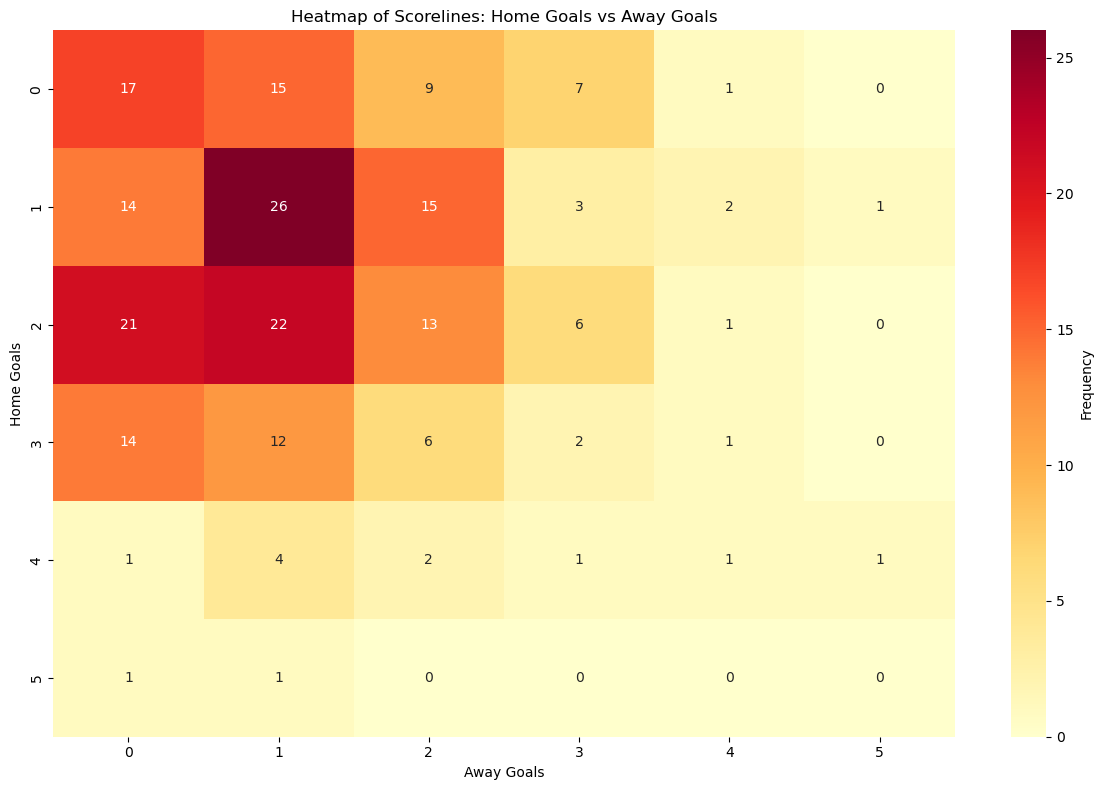

Total matches: 220
Total draws: 59
Draw frequency: 26.82%


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating a crosstab of home goals vs away goals
scoreline_matrix = pd.crosstab(df['FTHG'], df['FTAG'])

# creating a heatmap to visualize the scoreline frequencies
plt.figure(figsize=(12, 8))
sns.heatmap(scoreline_matrix, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Frequency'})
plt.xlabel('Away Goals')
plt.ylabel('Home Goals')
plt.title('Heatmap of Scorelines: Home Goals vs Away Goals')
plt.tight_layout()
plt.show()

# general stats
total_matches = len(df)
draws = (df['FTHG'] == df['FTAG']).sum()
draw_percentage = (draws / total_matches) * 100
print(f"Total matches: {total_matches}")
print(f"Total draws: {draws}")
print(f"Draw frequency: {draw_percentage:.2f}%")

## Draw Rate (by Goal Total, by team, etc.)